# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

Begin by reading in `"data/penguins.csv"` as a pandas DataFrame called `penguins_df`, then investigate and clean the dataset by removing the null values and outliers. Save as a cleaned DataFrame called `penguins_clean`.

In [1]:
# Importing Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

In [2]:
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [3]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


Pre-process the cleaned data using standard scaling and the one-hot encoding to add dummy variables:
- Create the dummy variables and remove the original categorical feature from the dataset.
- Scale the data using the standard scaling method.
- Save the updated data as a new DataFrame called `penguins_preprocessed`.

In [4]:
q1 = penguins_df["flipper_length_mm"].quantile(0.25)
q3 = penguins_df["flipper_length_mm"].quantile(0.75)
iqr = q3 - q1
factor = 1.5

# Calculate the limits
lower_threshold = q1 - (iqr * factor)
upper_threshold = q3 + (iqr * factor)

# Create masks
is_lower = penguins_df["flipper_length_mm"] < lower_threshold
is_upper = penguins_df["flipper_length_mm"] > upper_threshold

# Filter
outliers = penguins_df["flipper_length_mm"][is_lower | is_upper]

# Print the # of outliers
print(len(outliers))

2


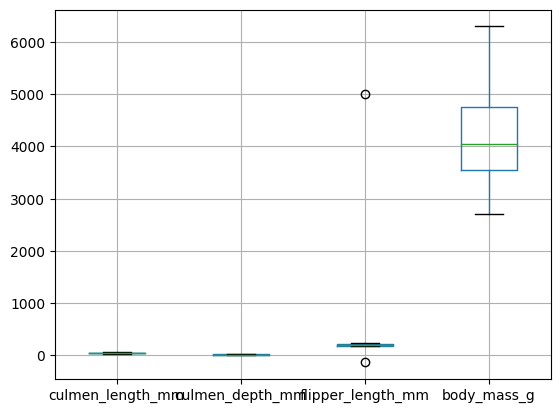

In [5]:
penguins_df.boxplot()
plt.show()
penguins_df.dropna(inplace=True)

In [6]:
penguins_df[penguins_df['flipper_length_mm']>4000]
penguins_df[penguins_df['flipper_length_mm']<0]
penguins_clean = penguins_df.drop([9,14])

In [7]:
df = pd.get_dummies(penguins_clean)
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_.', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [8]:
df.drop(['sex_.'], axis=1, inplace=True)
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


Perform Principal Component Analysis (PCA) on the `penguins_preprocessed` dataset to determine the desired number of components, considering any component with an explained variance ratio above 10% as a suitable component. Save the number of components as a variable called `n_components`.
- Finally, execute PCA using `n_components` and store the result as `penguins_PCA`.

In [10]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_

n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)

pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

Employ k-means clustering on the `penguins_PCA` dataset, setting `random_state=42`, to determine the number of clusters through elbow analysis. Save the optimal number of clusters in a variable called `n_cluster`.

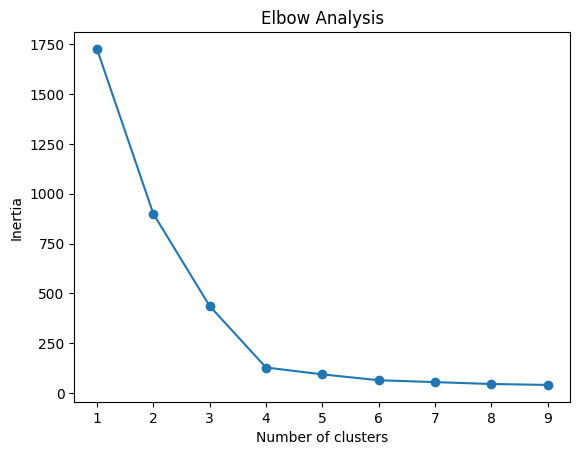

In [11]:
inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Analysis')
plt.show()

In [12]:
# The optimal number of clusters
n_clusters = 4

Create and fit a new k-means cluster model, setting `n_cluster` equal to your `n_cluster` variable, saving the model as a variable called `kmeans`.
- Visualize your clusters using the first two principle components. 

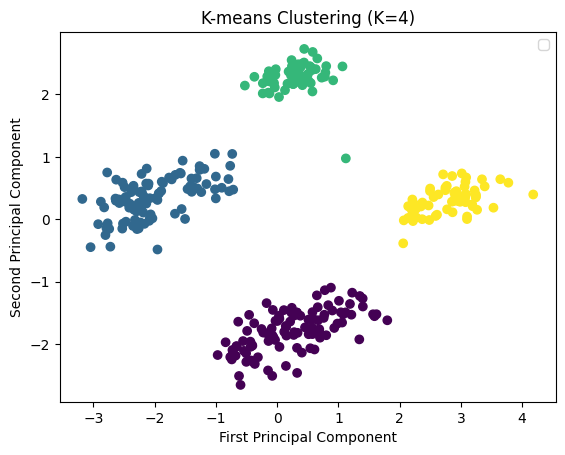

In [13]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

Add the `label` column extracted from the k-means clustering (using `kmeans.labels_`) to the `penguins_clean` DataFrame.

Create a statistical table by grouping `penguins_clean` based on the `"label"` column and calculating the mean of each numeric column. Save this table as `stat_penguins`.

In [14]:
penguins_clean["label"] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby("label").mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
